In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

df_og = pd.read_csv('AirQualityUCI.csv')
df_og.head()
from pandas_profiling import ProfileReport
prof = ProfileReport(df_og)
prof.to_file(output_file='output.html')


#given most of the data is best represented as change over time, scatter plot will be the best way to show the relationship




,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,2004-03-10,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,2004-03-10,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,2004-03-10,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,2004-03-10,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,2004-03-10,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [27]:
df= (pd.read_csv('AirQualityUCI.csv')
     .drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)','PT08.S3(NOx)','PT08.S4(NO2)','PT08.S5(O3)','Unnamed: 15','Unnamed: 16','RH','AH'])
     .dropna()
     .rename(columns={"NMHC(GT)": "Nonmethane Hydrocarbons", "C6H6(GT)": "Benzene", "NOx(GT)": "Nitrogen Oxides", "NO2(GT)": "Nitrogen Dioxide"})
    )
df.head()
sns.jointplot(x='T', y='CO(GT)', data=df, kind='reg')

#Below figure show relationship between Temperature and CO emiision
#Based on the scatter plot seen below, we can predict that as temperature increase, it seems CO emission seemed to be decreased






,Date,Time,CO(GT),Nonmethane Hydrocarbons,Benzene,Nitrogen Oxides,Nitrogen Dioxide,T
0,2004-03-10,18:00:00,2.6,150.0,11.9,166.0,113.0,13.6
1,2004-03-10,19:00:00,2.0,112.0,9.4,103.0,92.0,13.3
2,2004-03-10,20:00:00,2.2,88.0,9.0,131.0,114.0,11.9
3,2004-03-10,21:00:00,2.2,80.0,9.2,172.0,122.0,11.0
4,2004-03-10,22:00:00,1.6,51.0,6.5,131.0,116.0,11.2


<Figure size 720x720 with 0 Axes>

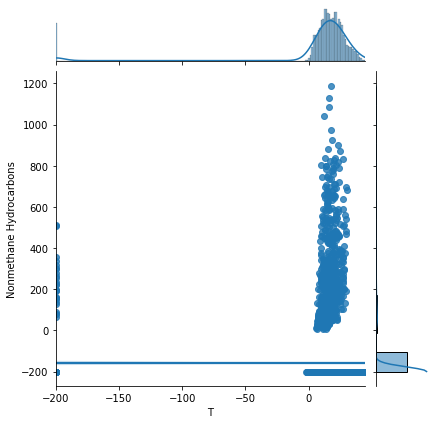

In [24]:
plt.figure(figsize=(10,10))
sns.jointplot(x='T', y='Nonmethane Hydrocarbons', data=df, kind='reg')

#from the scatter plot below it seems temperature does not significantly influence emission of Nonmethane Hydrocarbons


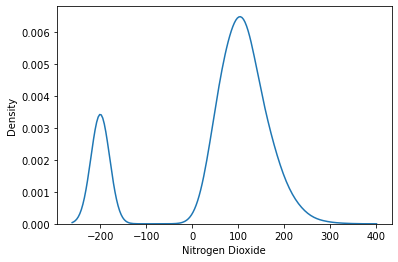

In [35]:
sns.kdeplot(df['Nitrogen Dioxide'])


#from the data below, one can notice that majority of the NO2 reported are around 100 PPM